# Clusterizace

Také se nazývá shluková analýza, v angličtině clustering. Slouží k roztřídění dat, o kterých nepotřebujeme znát jejich význam, vytváří skupiny (shluky objektů / clustery) na základě podobnosti - aby si prvky skupiny byli navzájem podobní, ale nebyli příliš podobní s prvky mimo tutu skupinu.

## Použití

Umožňuje řešit typ problému, který se vyskytuje v mnoha oblastech, například data mining, marketing, biologie, medicína, analýza obrazu, počítačová grafika, machine learning a další.

### Kdy použít clusterizaci a kdy klasifikaci
Obě metody se využívají pro rozdělení do skupin na základě vlastností prvků, takže jsou si celkem podobné, ale mají jisté rozdíly, které určují jejich využití.

| Parametr | Klasifikace | Clusterizace |
| --- | --- | --- |
| učení | s učitelem (trénovací data) | bez učitele |
| použití | rozdělení do předem definovaných tříd | rozdělení do clusterů na základě podobnosti, "neznáme" význam tříd |
| komplexnost | složitější než clusterizace | méně složitá než klasifikace |

Klasifikace vyžaduje učení s učitelem, takže je třeba mít nějaká data obsahující třídy, do kterých jsou roztříděny.

Clusterizaci použijeme v případě, že hledáme nějakou novou, dosud neznámou informaci, předem neznáme výstup. Například rozdělení diváků seriálů do clusterů podle toho, na co se dívali, pro doporučení dalších pořadů (Netflix).

### Použité knihovny
##### NumPy
- Práce s maticemi
- https://numpy.org/doc/stable/index.html

##### matplotlib
- Práce s grafy
- https://matplotlib.org/

##### skicit-learn 
- Nástroje pro machine learning
- https://scikit-learn.org/stable/index.html

##### SciPy
- Nástroje pro různé matematické a vědecké operace
- Obsahuje i základní algoritmy pro clusterizaci
- https://www.scipy.org/scipylib/index.html


## Hierarchické algoritmy
Rozdělení do hierarchické struktury clusterů. Může být přístup **bottom-up**, kde se jednotlivé datové prvky spojují do clusterů, nebo **top-down**, kde na začátku máme velký cluster, který postupně rozdělujeme na menší clustery. 



*postup:*
    1. Každý prvek se přiřadí do samostatného clusteru. Tedy na začátku bude stejný počet clusterů jako je datových prvků.
    2. Najde se nebližší (nejpodobnější) dvojice clusterů, které se spojí do společného clusteru. Tedy se sníží počet clusterů o jedna. Tento krok opakujeme, dokud není překročena omezující podmínka nebo dokud není pouze jeden cluster.

Omezující podmínkou může být počet clusterů nebo maximální vzdálenost.

Pro hierarchické algoritmy jsou typické dendrogramy znázorňující jednotlivé kroky.

Základní algoritmy mají časovou složitost O(n^3), což není moc dobré, především pro velké datové sady.

Vzdálenost clusterů je určena různými metodami propojení (linkage criteria), kde nejběžnější je **Single-linkage**, která určuje vzdálenost clusterů na základě 2 nejbližších prvků jednotlivých clusterů. Další metrikou je **Complete-linkage**, která určuje vzdálenost clusterů jako vzdálenost jejich nejvzdálenějších prvků. Třetí možností je **Average-linkage**, která rozhoduje na základě průměru clusterů. Používá se také **Ward-linkage**, která je složitější a snaží se minimalizovat varianci clusterů, které se slučují.
<img src="resources/linkage.png">
(https://www.researchgate.net/figure/The-three-linkage-types-of-hierarchical-clustering-single-link-complete-link-and_fig57_281014334)

#### Jednoduchý Příklad
(https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/)

Importy

In [1]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

- Vytvoření bodů a jejich vykreslení v grafu

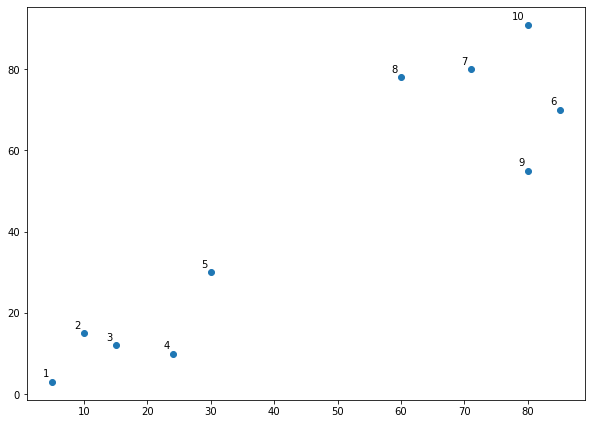

In [2]:
X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [80,55],
    [80,91],])

labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

- Hierarchické clusterování bottom-up na základě **Euklidovké vzdálenosti**
- Vykreslení dendrogramu, kde můžeme vidět pořadí vytváření clusterů. Hodnota na vertikální ose udává vzdálenost

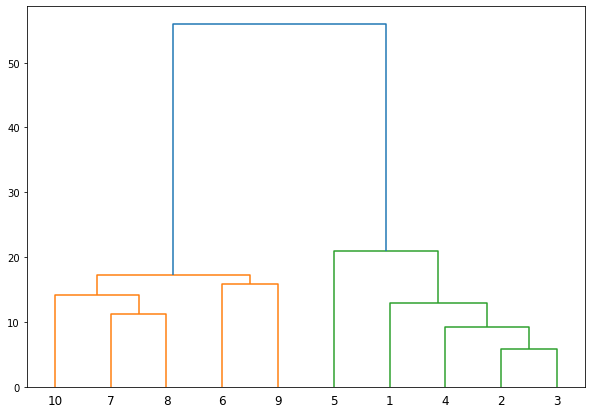

In [3]:
linked = linkage(X, 'single')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

- Použití knihovny skicit-learn pro hierarchické clusterování

[1 1 1 1 1 0 0 0 0 0]


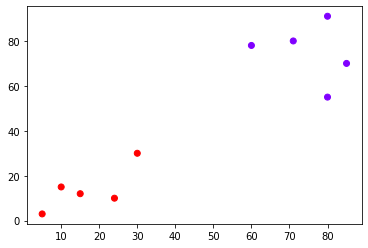

In [4]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)
print(cluster.labels_)
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')
plt.show()

##### Zajímavé parametry funkce AgglomerativeClustering
- n_clusters - počet clusterů, nelze kombinovat s distance_threshold
- affinity - metrika použitá pro výpočet vzdálenosti
- linkage - linkage metoda pro určení vzdálenosti clusterů
- distance_threshold - hranice, kdy clustery o větší vzdálenosti nebudou sloučeny, nelze kombinovat s n_clusters

#### Příklad - Porovnání linkage metod
(https://scikit-learn.org/stable/auto_examples/cluster/plot_linkage_comparison.html)
- importy

In [5]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

- vygenerování různých datasetů

In [6]:
np.random.seed(0)

n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3,
                'min_samples': 20,
                'xi': 0.05,
                'min_cluster_size': 0.1}

datasets = [
    (noisy_circles, {'damping': .77, 'preference': -240,
                     'quantile': .2, 'n_clusters': 2,
                     'min_samples': 20, 'xi': 0.25}),
    (noisy_moons, {'damping': .75, 'preference': -220, 'n_clusters': 2}),
    (varied, {'eps': .18, 'n_neighbors': 2,
              'min_samples': 5, 'xi': 0.035, 'min_cluster_size': .2}),
    (aniso, {'eps': .15, 'n_neighbors': 2,
             'min_samples': 20, 'xi': 0.1, 'min_cluster_size': .2}),
    (blobs, {}),
    (no_structure, {})]

- clusterizace
- vykreslení výsledků

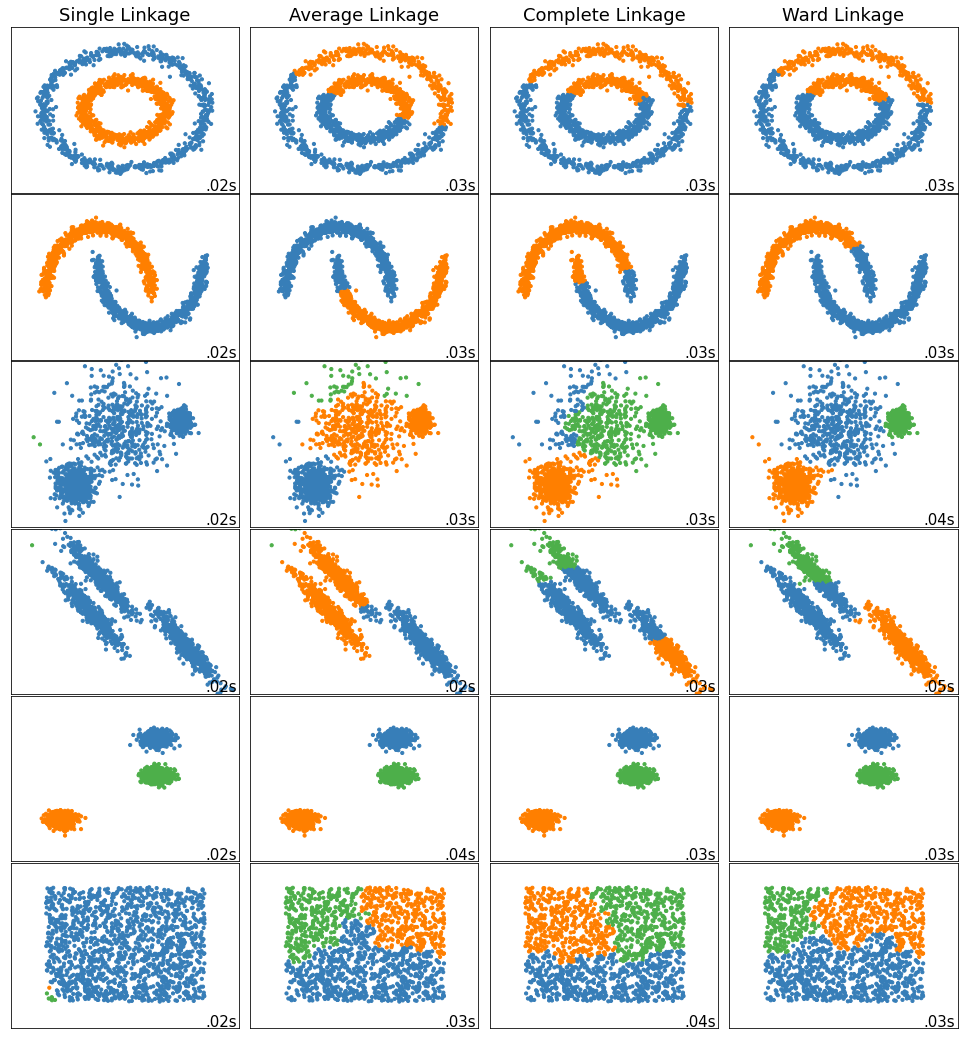

In [7]:
plt.figure(figsize=(9 * 1.3 + 2, 14.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # ============
    # Create cluster objects
    # ============
    ward = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='ward')
    complete = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='complete')
    average = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='average')
    single = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='single')

    clustering_algorithms = (
        ('Single Linkage', single),
        ('Average Linkage', average),
        ('Complete Linkage', complete),
        ('Ward Linkage', ward),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()

## Nehierarchické algoritmy
Netvoří se stromová struktura mezi jednotlivými clustery. Nehierarchické algoritmy jsou všeobecně rychlejší než hierarchické, což je důležité především u velkých datových sad.

###  k-means
Nejběžnější nehierarchický algoritmus, iterativně formuje clustery. Počet clusterů (k) musí být předem známý. Průměrná složitost je O(knT), kde T je počet iterací.

Vhodný pro clustery podobných velikostí a nižší počet clusterů.

*postup:*
    1. Náhodně se zvolí k vzorků dat, které tvoří středy clusterů, tzv. centroidy
    2. Přiřadí se každý ze vzorků do clusteru nejbližšího centroidu
    3. Vypočítá se střed každého clusteru pomocí průměru a centroidy se umístí do těchto bodů
    4. Kroky 2 a 3 opakujeme dokud se centroidy nepřestanou měnit (případně při překročení omezující podmínky, např. počet iterací)
    
Clustery jsou tedy tvořeny na základě vzdálenosti jednotlivých prvků od centroidů. Z toho důvodu předpokládá, že jednotlivé clustery jsou kruhové a není příliš vhodný pro clustery jiných tvarů.

Ukázka algoritmu, náhodný výběr v prvním kroku může zásadně ovlivnit výsledek algoritmu.
<img src="resources/kmeans.gif">
(https://realpython.com/k-means-clustering-python/)

#### Příklad

- Použití stejných dat jako při ukázce hierarchického algoritmu
- Použití funkce KMeans

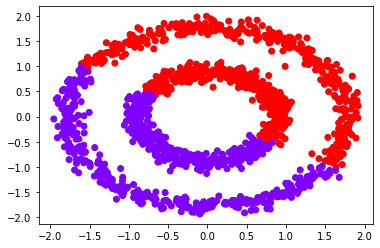

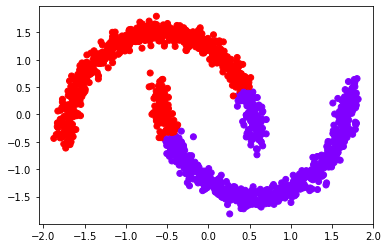

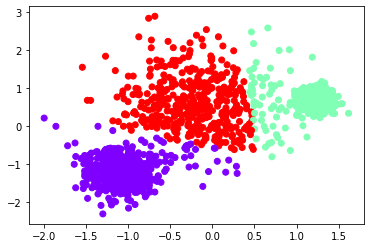

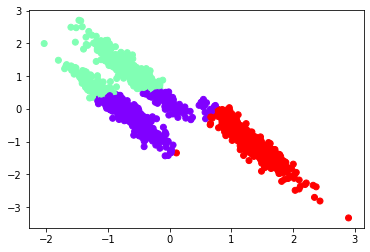

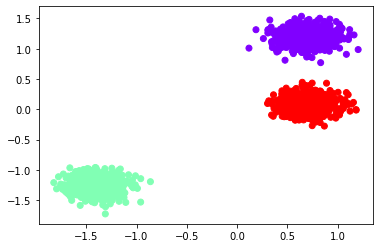

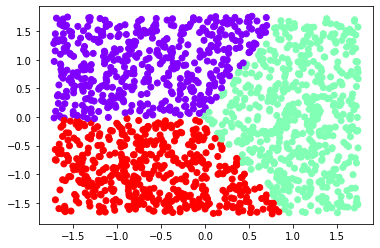

In [8]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    model = KMeans(n_clusters=params['n_clusters']).fit(X)
    plt.scatter(X[:,0],X[:,1], c=model.labels_, cmap='rainbow')
    plt.show()

##### Zajímavé parametry KMeans
- n_clusters - počet clusterů
- init - metoda pro volbu výchozích centroidů, výchozí hodnota se snaží najít nejlepší volbu pro kratší běh algoritmu
- n_init - algoritmus bude spuštěn vícekrát s různými výchozími pozicemi centroidů pro záskání nejlepšího výsledku (default = 10)
- max_iter - maximální množství iterací
- tol - tolerance, ve které se považuje změna pozice centroidu za nulovou

###  DBSCAN (Density Based Spatial Clustering of Applications with Noise)
Algoritmus založený na hustotě - jak moc sousedů se nachází v okolí jednoho bodu. Nepotřebuje znát počet clusterů, takže je vhodný když toto množství neznáme nebo nemůžeme vizualizovat dataset. Vidí cluster jako oblast, kde jsou data v hustém shluku, kolem kterého jsou data v menší hustotě. Díky tomu mohou být clustery libovolných tvarů, oproti k-means, který předpokládá, že jsou clustery konvexního tvaru. 

<img src="resources/convex.png">

(https://undergroundmathematics.org/glossary/convex-shape)

Algoritmus je založený na konceptu "core samples", což jsou vzorky, které se nacházejí v oblastech velké hustoty, kolem kterých se tvoří clustery. Je vhodný pro data s clustery podobné hustoty.

#### Jednoduchý příklad
(https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py)

- na některých grafech lze vidět na okraji clusterů jinak zbarvené prvky - ty byly označeny za "noise"

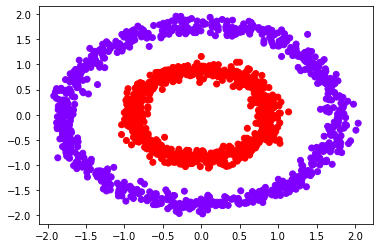

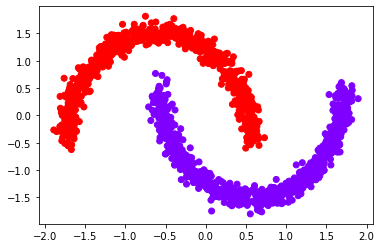

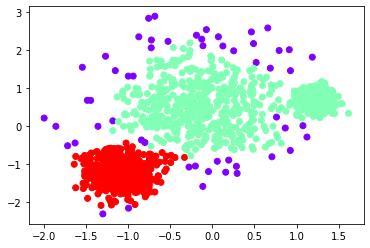

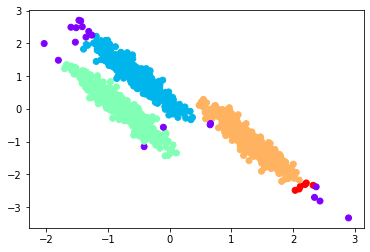

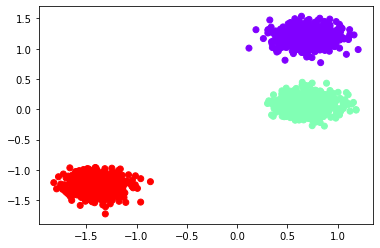

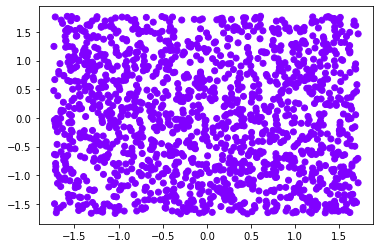

In [39]:
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    model = DBSCAN(eps=params['eps']).fit(X)
    plt.scatter(X[:,0],X[:,1], c=model.labels_, cmap='rainbow')
    plt.show()

##### Zajímavé parametry DBSCAN
- eps - Maximální vzdálenost mezi prvky, aby byly považovány, že jsou v blízkosti
- min_samples - minimální množství prvků, které musí být v blízkosti, aby byl bod považovaný za "core sample"
- metric - metrika použitá pro výpočet vzdálenosti

## Další algoritmy knihovny skicit-learn

### Affinity propagation
Pro menší velikosti datasetů a velké množství clusterů různých velikostí. Počet clusterů se určí na základě dat.

Algoritmus vyhledá "exempláře" clusterů, kolem kterých shlukuje ostatní prvky.

#### Příklad


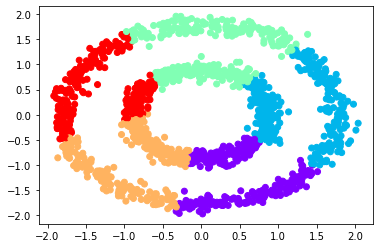

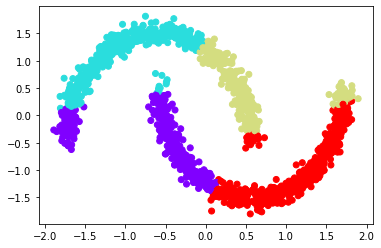

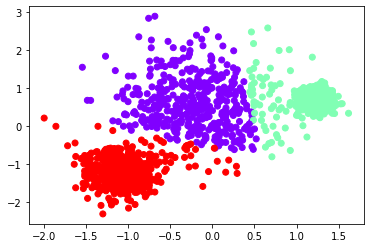

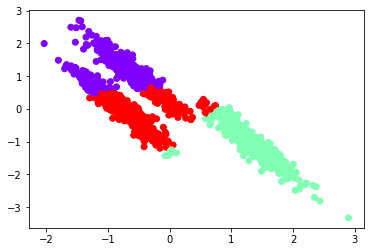

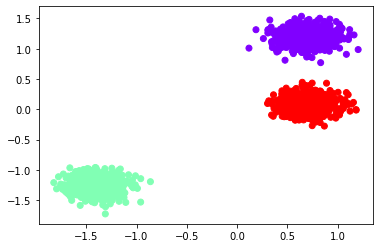

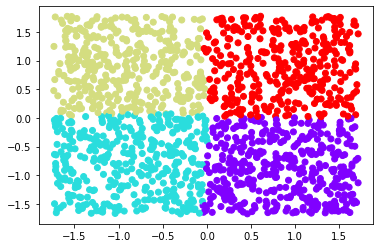

In [41]:
from sklearn.cluster import AffinityPropagation
from matplotlib import pyplot as plt

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    model = AffinityPropagation(damping=params['damping'], preference=params['preference'], random_state=None).fit(X)
    plt.scatter(X[:,0],X[:,1], c=model.labels_, cmap='rainbow')
    plt.show()

##### Zajímavé parametry AffinityPropagation
- damping - algoritmus se snaží o konvergenci, tento parametr určuje tlumení, aby nedošlo k rozkmitání
- preference - předání vektoru, kde lze vzorkům přiřadit vyšší prioritu, aby se staly exemplářem 

### Mean-shift
Vhodné pro velké množství clusterů, které se liší velikostí. Využívá centroidy, kde se nachází průměr bodů v jejich okruhu. Není vhodný pro velké množství dat. Není třeba specifikovat počet clusterů.

Lze použít parametr bandwidth, který ovlivňuje vzdálenost prohledávání okolí prvků pro výpočet průměru, s nižší hodnotou vznikne více clusterů. 

#### Příklad
- bandwidth je automaticky vygenerován

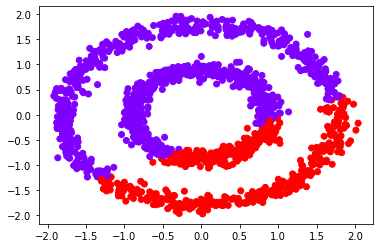

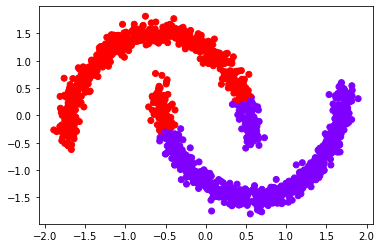

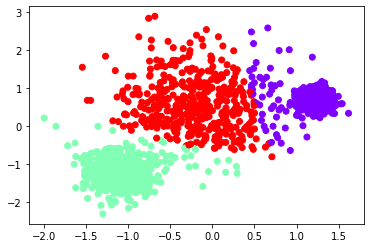

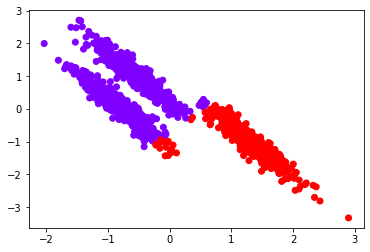

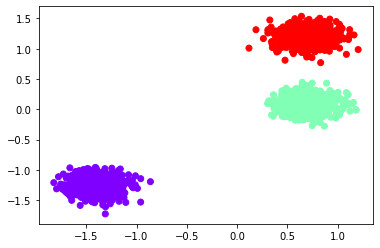

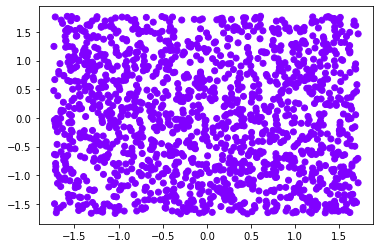

In [43]:
from sklearn.cluster import MeanShift
from matplotlib import pyplot as plt

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)
    bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])
    model = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(X)
    plt.scatter(X[:,0],X[:,1], c=model.labels_, cmap='rainbow')
    plt.show()

##### Zajímavé parametry MeanShift
- bandwidth - velikost regionu, pokud není zadán, je vypočítán automaticky funkcí estimate_bandwidth

### Spectral clustering
Používá se pro obrazová data. Vhodné pro menší množství clusterů, které jsou podobných velikostí. Používá se na obrazová data. Potřebuje matici podobnosti, kde je definovaná podobnost všech dvojicí prvků. Dále provádí redukci dimenzí pro zjednodušení výpočtů. Dále využívá nějaký jiný algoritmus pro clusterizaci, například *k-means* a předem potřebuje znát počet clusterů. Na data se dívá jako na prvky grafu a využívá grafové operace.

#### Příklad
(https://scikit-learn.org/stable/auto_examples/cluster/plot_segmentation_toy.html)

- rozdělení prvku v obraze na 2 části

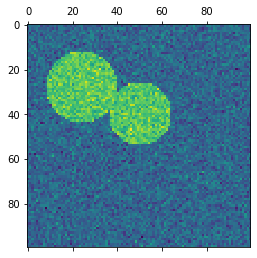

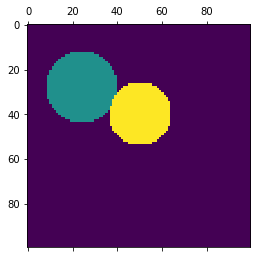

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

l = 100
x, y = np.indices((l, l))

center1 = (28, 24)
center2 = (40, 50)

radius1, radius2 = 16, 14

circle1 = (x - center1[0]) ** 2 + (y - center1[1]) ** 2 < radius1 ** 2
circle2 = (x - center2[0]) ** 2 + (y - center2[1]) ** 2 < radius2 ** 2

img = circle1 + circle2
mask = img.astype(bool)
img = img.astype(float)

img += 1 + 0.2 * np.random.randn(*img.shape)

graph = image.img_to_graph(img, mask=mask)
graph.data = np.exp(-graph.data / graph.data.std())

labels = spectral_clustering(graph, n_clusters=2)
label_im = np.full(mask.shape, -1.)
label_im[mask] = labels

plt.matshow(img)
plt.matshow(label_im)

plt.show()

#### Příklad 2

C:\Users\Martin\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


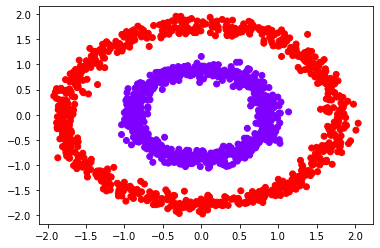

C:\Users\Martin\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


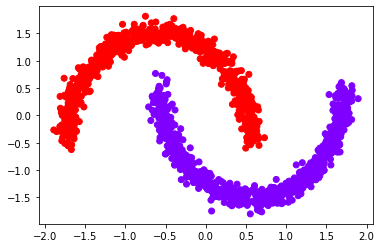

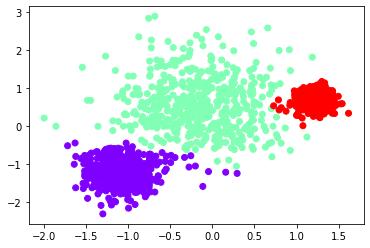

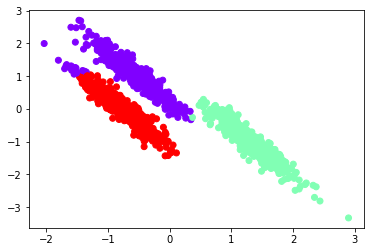

C:\Users\Martin\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


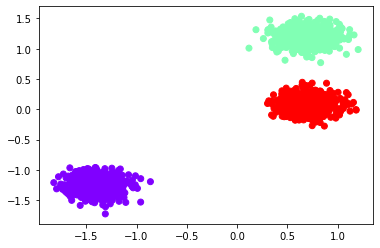

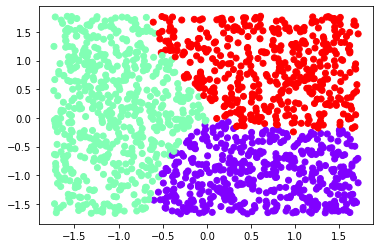

In [45]:
from sklearn.cluster import SpectralClustering
from matplotlib import pyplot as plt

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)
    model = SpectralClustering(n_clusters=params['n_clusters'], eigen_solver='arpack',
        affinity="nearest_neighbors").fit(X)
    plt.scatter(X[:,0],X[:,1], c=model.labels_, cmap='rainbow')
    plt.show()

##### Zajímavé parametry spectral_clustering
- affinity - povinný parametr pro matici podobnosti
- n_clusters - počet clusterů
- n_init - stejný jako u k-means, počet běhů algoritmu k-means pro nejlepší výsledek při různých náhodných volbách pozic centroidů

### OPTICS

Optics je algoritmus podobný jako DBSCAN, ale odstraňuje jednu z jeho nevýhod, což je problém s clustery různých hustot. Tento problém je vyřešen řazením bodů podle vzájemné vzdálenosti a každého bodu ukládání speciální hodnoty, která určuje požadovanou hustotu, aby bod mohl být součástí clusteru.

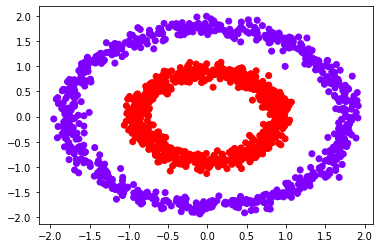

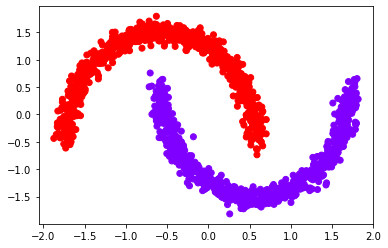

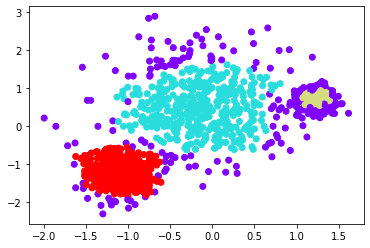

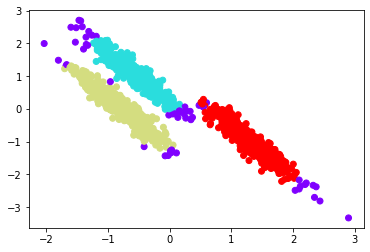

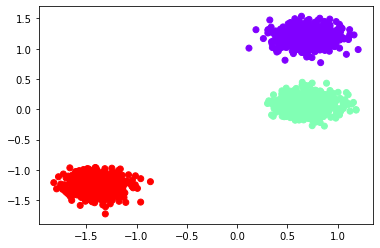

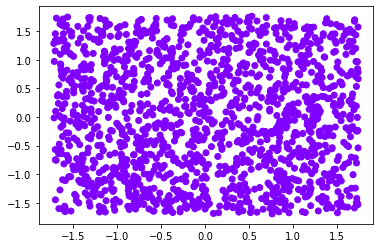

In [54]:
from sklearn.cluster import OPTICS
from matplotlib import pyplot as plt

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)
    model = OPTICS(min_samples=params['min_samples'],
                            xi=params['xi'],
                            min_cluster_size=params['min_cluster_size']).fit(X)
    plt.scatter(X[:,0],X[:,1], c=model.labels_, cmap='rainbow')
    plt.show()

##### Zajímavé parametry OPTICS
- min_samples - počet vzorků v blízkosti,a by byl bod považován za "core point"
- max_eps - maximální vzdálenost mezi dvěma vzorky, aby byly považovány navzájem v blízkosti
- min_cluster_size - minimální počet vzorků v clusteru

### Gaussian mixtures
Provádí tzv. *soft clustering*, kde jednotlivé prvky nejsou pevně přiřazeny clusterům, ale mají určenou pravděpodobnost příslušnosti do clusterů. Využívá Gaussova (normálního) rozdělení a kovarienci.

#### Příklad
- použití Gaussian mixtures pro klasifikaci. Pravděpodobnosti přiřazení lze zjistit funkcí predict_proba()

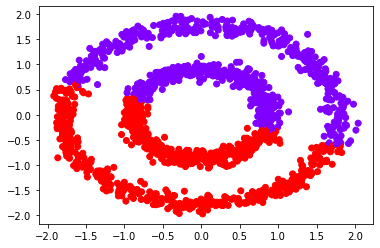

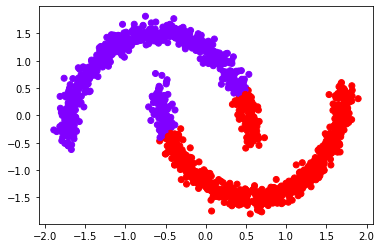

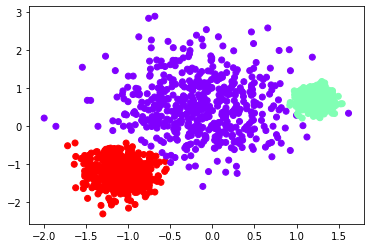

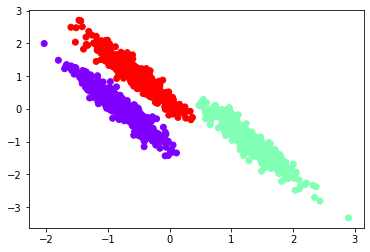

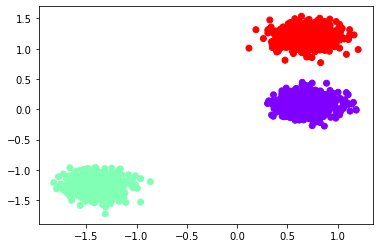

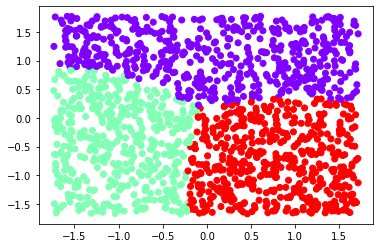

In [48]:
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot as plt

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)
    model = GaussianMixture(n_components=params['n_clusters'], covariance_type='full').fit(X)
    plt.scatter(X[:,0],X[:,1], c=model.predict(X), cmap='rainbow')
    plt.show()

##### Zajímavé parametry GaussianMixture
- n_components - počet komponent (clusterů)
- covariance_type - kovarience vzhledem k jednotlivým komponentům
- tol - hranice pro konvergenci
- n_init - počet inicializací, ze kterých se vybere nejlepší výsledek

### Birch

Hierarchický algoritmus, vhodný pro velké datasety a velké počty clusterů. Algoritmus tvoří strom složený z prvků zvaných *Clustering Feature* (CF), pomocí kterých redukuje dataset, protože prvky obsahují pouze základní informace o clusterech. Tyto prvky můžou obsahovat další prvky jako jejich potomky.

#### Příklad
- funkce fit vytvoří CF strom
- funkce predict uskuteční clusterování

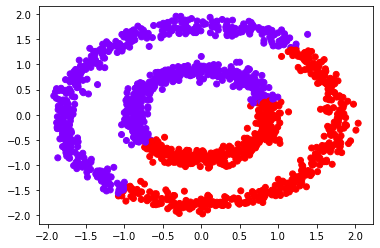

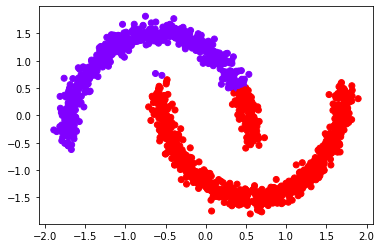

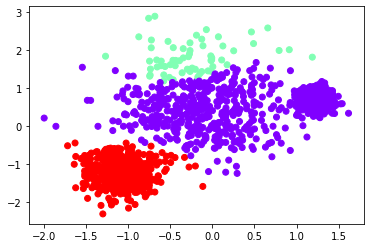

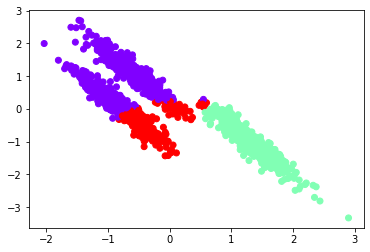

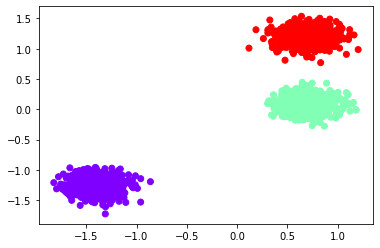

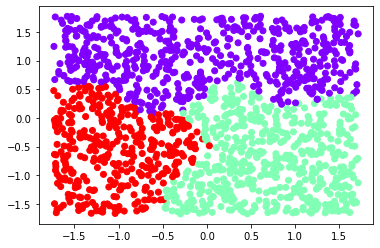

In [49]:
from sklearn.cluster import Birch 
from matplotlib import pyplot as plt

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)
    model = Birch(n_clusters=params['n_clusters']).fit(X)
    plt.scatter(X[:,0],X[:,1], c=model.predict(X), cmap='rainbow')
    plt.show()

In [ ]:
##### Zajímavé parametry Birch
- threshold - maximální vzdálenost 2 bodů pro sloučení
- branching_factor - maximální množství potomků v jednom uzlu
- n_clusters - finální počet clusterů

## Porovnání algoritmů
<img src="resources/algcomparison.png">

(https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html)

## SOM (Self Organizing Maps) - Clusterizace pomocí neuronových sítí
Cílem této metody je transformovat data mnoha rozměrů na jednodušší data o menším množství rozměrů, kdy zachováme topologii v datech. Provádí mapování dat mnoha rozměrů na dvourozměrný prostor.

Síť se většinou skládá z dvou vrstev - vstupní a výstupní.

### Trénování
Jedná se o tzv *Competitive learning*, kde výstupní uzly soutěží o to, který bude reprezentovat vzor na vstupu. Uzel, jehož vektor vah se nejvíce blíží vstupu vyhrává. Vektor vah výherce a blízké uzly se ještě více přiblíží vzoru na vstupu. Tohle při iterování způsobí, že sousední uzly výstupu reprezentují podobné vzory a vzdálenější body reprezentují odlišné. Pokud na vstupních datech jsou shluky podobných bodů, budou častěji aktivovány stejné body na výstupu, a tím se vytvoří clustery.

<img src="resources/som.png">

(https://www.superdatascience.com/blogs/the-ultimate-guide-to-self-organizing-maps-soms)